# MLP for MNIST (Handwritten Digit Recognition)

This gives an introduction to how we can use neural networks for image data. This is a simplified application in that the
modern layer types (convolution/pooling) are not used; we treat it as a normal classification problem

The notebook shows how you can plot the performance of the network during training, and it shows how to use GridSearchCV to tune hyperparameters

In [53]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt

from IPython.display import clear_output

from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Softmax, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.callbacks import Callback

from sklearn.model_selection import train_test_split
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [42]:
# Load the dataset. The dataset is available through Keras
(trainval_x, trainval_y), (test_x, test_y) = load_data()
trainval_x.shape

(60000, 28, 28)

In [43]:
trainval_y.shape

(60000,)

In [44]:
# Normalize the images
trainval_x = trainval_x / 255.0
test_x = test_x / 255.0

# Add a new dimension. We typically have several image channels (RGB), so it is a normal 
# convention to have the channels in a separate dimension. 
trainval_x = trainval_x[..., tf.newaxis].astype("float32")
test_x = test_x[..., tf.newaxis].astype("float32")
trainval_x.shape

(60000, 28, 28, 1)

In [45]:
# Split the training data into training and validation. We'll use stratified sampling 
train_x, val_x, train_y, val_y =  train_test_split(trainval_x, trainval_y, test_size=0.2, stratify=trainval_y)

In [46]:
# Our first network. 
model = Sequential([
  Input(shape=(28,28,1)),         # Input shape matches our data 
  Flatten(),                      # Flatten the data to 784x1
  Dense(128, activation='relu'),  # One hidden layer with 128 neurons and relu activation function
  Dense(10),                      # The output neurons
  Softmax()                       # Softmax to convert outputs to probabilities (sum to 1.)
])

In [47]:
# Finalize the model. We use SparseCategoricalCrossentropy since the targets are not one-hot encoded
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=['accuracy'])
# Train the network
model.fit(train_x, train_y, epochs=20, batch_size=32)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8679 - loss: 0.4786
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9601 - loss: 0.1369
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9735 - loss: 0.0901
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9814 - loss: 0.0661
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9848 - loss: 0.0481
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9890 - loss: 0.0374
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9918 - loss: 0.0283
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9940 - loss: 0.0209
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9949 - loss: 0.0181
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9964 - loss: 0.0133
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9969 - loss: 0.0117
Epoch 12/20
1500/1500 ━━━━━━━━

In [48]:
# Evaluate the network with validation data
val_scores = model.evaluate(val_x, val_y)
val_scores

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9756 - loss: 0.1380


[0.135415181517601, 0.9754999876022339]

In [49]:
# Evaluate the network with test data
test_scores = model.evaluate(test_x, test_y)
test_scores

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9737 - loss: 0.1164


[0.09931188076734543, 0.9775000214576721]

In [ ]:
# Create a custom callback that can let us plot the performance of our network during training.
# There are built-in callbacks that provide the same functionality, but this lets you include the 
# resulting plots in a notebook.
# 
# This type of plots can allow you to easily tune the number of epochs to use
class EpochCallback(Callback):
    def on_train_begin(self, logs={}):
        # Start epoch counter at 0
        self.i = 0              
        # Create lists to store values for plotting
        self.x = []
        self.losses = []
        self.val_losses = []
        # Start plot
        self.fig = plt.figure()
        
    def on_epoch_end(self, epoch, logs={}):
        # Append values to plot lists
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        # Increase epoch counter
        self.i += 1
        
        # Clear the notebook output
        clear_output(wait=True)
        # Plot values with labels
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show()

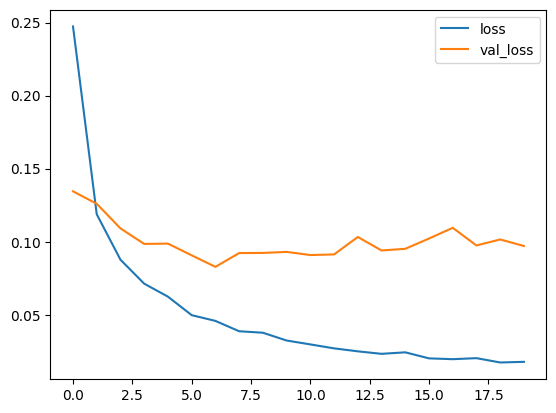

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9950 - loss: 0.0155 - val_accuracy: 0.9782 - val_loss: 0.0971


In [57]:
# Our second network, this time with two hidden layers, and a BatchNormalization layer in-between
model2 = Sequential([
  Input(shape=(28,28,1)),         # Input shape matches our data 
  Flatten(),                      # Flatten the data to 784x1
  Dense(128, activation='relu'),  # Hidden layer with 128 neurons and relu activation function
  BatchNormalization(),           # Batch normalization layer, normalizes values using batch mean and standard deviation
  Dense(64, activation='relu'),   # Hidden layer with 64 neurons and relu activation function
  Dense(10),                      # The output neurons
  Softmax()                       # Softmax to convert outputs to probabilities (sum to 1.)
])
# Finalize the model. We use SparseCategoricalCrossentropy since the targets are not one-hot encoded
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=['accuracy'])
# Train the network
model2.fit(train_x, train_y, epochs=20, batch_size=32, validation_data=[val_x, val_y], callbacks=[EpochCallback()])

In [58]:
# This shows how to do hyperparameter tuning using GridSearchCV

# This function is responsible for actually creating the neural networks. The 
# arguments to the function will be see tunable hyperparameters for the model.
# 
# This function allows for tuning the amount of drop out to do in the Dropout
# layer. Dropout layers randomly sets inputs to 0 to reduce overfitting
def create(drop_out):
    model = Sequential([
        Input(shape=(28,28,1)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(drop_out),
        Dense(10), 
        Softmax()
    ])
    # Finalize model
    model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
    return model

# The KerasClassifier object makes the model created by our create function into a 
# scikit-learn classifier. You need the same arguments here as in the create function 
# to be able to tune them. You also specify the arguments that will used during 
# the fit
classifier = KerasClassifier(create, drop_out=0.1, epochs=10, batch_size=32)

# Our parameter grid
params = {'drop_out':[0.1, 0.2, 0.3]}

# Normal scikit-learn training and tuning using GridSearchCV. We use trainval data
# since GridSearchCV handles the validation splits
grid = GridSearchCV(classifier, params)
grid.fit(trainval_x, trainval_y)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8536 - loss: 0.5012
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9585 - loss: 0.1463
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9697 - loss: 0.1007
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9762 - loss: 0.0786
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9801 - loss: 0.0618
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9849 - loss: 0.0498
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9869 - loss: 0.0424
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9891 - loss: 0.0360
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9899 - loss: 0.0325
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9910 - loss: 0.0284
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8538 - los

GridSearchCV(estimator=KerasClassifier(batch_size=32, drop_out=0.1, epochs=10, model=<function create at 0x762572686a20>),
             param_grid={'drop_out': [0.1, 0.2, 0.3]})

In [59]:
# Investigate the CV results
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_drop_out,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,35.790954,0.387161,0.975931,0.051174,0.1,{'drop_out': 0.1},0.978083,0.976250,0.976417,0.974000,0.978083,0.976567,0.001504,1
1,35.543253,0.241996,0.961710,0.036828,0.2,{'drop_out': 0.2},0.978500,0.977000,0.974500,0.971667,0.978083,0.975950,0.002554,2
2,35.712147,0.072815,0.967416,0.021098,0.3,{'drop_out': 0.3},0.977583,0.976917,0.973417,0.973750,0.977500,0.975833,0.001854,3


In [31]:
# We can access the best network configuration through best_estimator_.model_
grid.best_estimator_.model_.evaluate(test_x, test_y, batch_size=32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9755 - loss: 0.0859


[0.07169556617736816, 0.978600025177002]

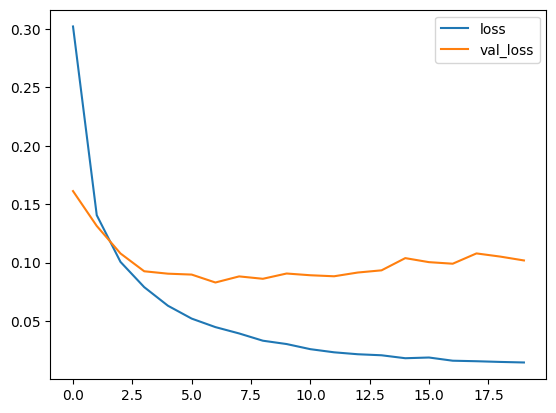

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9955 - loss: 0.0133 - val_accuracy: 0.9788 - val_loss: 0.1019


In [ ]:
# We can retrain with the best parameters found during grid search to optimize the number of epochs
model3 = create(drop_out=grid.best_params_['drop_out'])
model3.fit(train_x, train_y, epochs=20, batch_size=32, validation_data=[val_x, val_y], callbacks=[EpochCallback()])